Challenge Set 1  Part I   
Topic:        Explore MTA turnstile data  
Date:         04/10/2016  
Name:         Lucia Palova  
Worked with:  N/A

# Challenges 1 - 4 : Using dictionaries

# Reading Data

In [1]:
import csv
import collections
import dateutil.parser
import urllib
import contextlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

/home/lucia/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
first_key = ("A002","R051","02-00-00","59 ST")
other_key = ('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD')
first_key_ch5 = ('A002', 'R051', '59 ST')

In [3]:
# Reading data from a file on disk
def read_data(data):
    dict_list = []
    with open(data, 'rb') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            dict_list.append(row)
    return dict_list
dict_list = read_data('data/turnstile_160402.txt')
print dict_list[1:2]

[{'DIVISION': 'BMT', 'LINENAME': 'NQR456', 'EXITS                                                               ': '0001893282                                             ', 'ENTRIES': '0005595746', 'C/A': 'A002', 'STATION': '59 ST', 'TIME': '04:00:00', 'DATE': '03/26/2016', 'SCP': '02-00-00', 'UNIT': 'R051', 'DESC': 'REGULAR'}]


In [4]:
# Reading data directly from the url
def read_url(url):
    dict_list = []
    with contextlib.closing(urllib.urlopen(url)) as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            dict_list.append(row)
    return dict_list
url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_160402.txt'
dict_list_url = read_url(url)

In [5]:
# Checking that the two reading methods give the same result
import json
if json.dumps(dict_list) == json.dumps(dict_list_url):
    print("Equal")

Equal


# Challenge 1

In [6]:
def create_dict1(dict_list):
    new_dict = collections.defaultdict(list)
    for d in dict_list:
        key = ( d['C/A'], d['UNIT'], d['SCP'], d['STATION'] )
        value = [ d['LINENAME'], d['DIVISION'], d['DATE'], d['TIME'], d['DESC'], d['ENTRIES'], 
         d['EXITS                                                               '].strip()]
        new_dict[key].append(value) 
    return new_dict
my_dict = create_dict1(dict_list)
#print(my_dict.keys()[0])
#print(my_dict[my_dict.keys()[0]])
print first_key
print my_dict[first_key]

('A002', 'R051', '02-00-00', '59 ST')
[['NQR456', 'BMT', '03/26/2016', '00:00:00', 'REGULAR', '0005595746', '0001893277'], ['NQR456', 'BMT', '03/26/2016', '04:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/26/2016', '08:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/26/2016', '12:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/26/2016', '16:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/26/2016', '20:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/27/2016', '00:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/27/2016', '04:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/27/2016', '08:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/27/2016', '12:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/27/2016', '16:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/27/2016', '20:0

# Challenge 2

In [7]:
def create_dict2(dict_list):
    new_dict = collections.defaultdict(list)
    for d in dict_list:
        key = ( d['C/A'], d['UNIT'], d['SCP'], d['STATION'] )
        dt = datetime.strptime(d['DATE'] + " " + d['TIME'],'%m/%d/%Y %H:%M:%S')
        #dt = dateutil.parser.parse(d['DATE'] + " " + d['TIME'],'%m/%d/%Y %H:%M:%S')
        value = [ dt, int(d['ENTRIES']) ]
        new_dict[key].append(value) 
    for key in new_dict:
        new_dict[key].sort(key=lambda ls: ls[0])
        for i in range(len(new_dict[key])-1,0,-1):
            new_dict[key][i][1] -= new_dict[key][i-1][1]
        new_dict[key][0][1] = 0
    return new_dict
my_dict2 = create_dict2(dict_list)
print first_key
print my_dict2[first_key]

('A002', 'R051', '02-00-00', '59 ST')
[[datetime.datetime(2016, 3, 26, 0, 0), 0], [datetime.datetime(2016, 3, 26, 4, 0), 0], [datetime.datetime(2016, 3, 26, 8, 0), 0], [datetime.datetime(2016, 3, 26, 12, 0), 0], [datetime.datetime(2016, 3, 26, 16, 0), 0], [datetime.datetime(2016, 3, 26, 20, 0), 0], [datetime.datetime(2016, 3, 27, 0, 0), 0], [datetime.datetime(2016, 3, 27, 4, 0), 0], [datetime.datetime(2016, 3, 27, 8, 0), 0], [datetime.datetime(2016, 3, 27, 12, 0), 0], [datetime.datetime(2016, 3, 27, 16, 0), 0], [datetime.datetime(2016, 3, 27, 20, 0), 0], [datetime.datetime(2016, 3, 28, 0, 0), 0], [datetime.datetime(2016, 3, 28, 4, 0), 0], [datetime.datetime(2016, 3, 28, 8, 0), 34], [datetime.datetime(2016, 3, 28, 12, 0), 156], [datetime.datetime(2016, 3, 28, 16, 0), 246], [datetime.datetime(2016, 3, 28, 20, 0), 509], [datetime.datetime(2016, 3, 29, 0, 0), 205], [datetime.datetime(2016, 3, 29, 4, 0), 9], [datetime.datetime(2016, 3, 29, 8, 0), 37], [datetime.datetime(2016, 3, 29, 12, 0),

# Challenge 3

In [8]:
def create_dict3(dict2):
    dict3 = collections.defaultdict(list)
    for key in dict2:
        l = []
        hist = collections.defaultdict(int)
        for item in dict2[key]:
            d = item[0]
            hist[str(d.date())] += item[1]
        for k in hist:
            l.append([dateutil.parser.parse(k),hist[k]])
        dict3[key]=l
        del(l)
        del(hist)
    return dict3        

In [9]:
my_dict3 = create_dict3(my_dict2)
print first_key
print my_dict3[first_key]

('A002', 'R051', '02-00-00', '59 ST')
[[datetime.datetime(2016, 3, 26, 0, 0), 0], [datetime.datetime(2016, 3, 27, 0, 0), 0], [datetime.datetime(2016, 4, 1, 0, 0), 1207], [datetime.datetime(2016, 3, 31, 0, 0), 454], [datetime.datetime(2016, 3, 30, 0, 0), 1144], [datetime.datetime(2016, 3, 28, 0, 0), 945], [datetime.datetime(2016, 3, 29, 0, 0), 1144]]


# Challenge 4

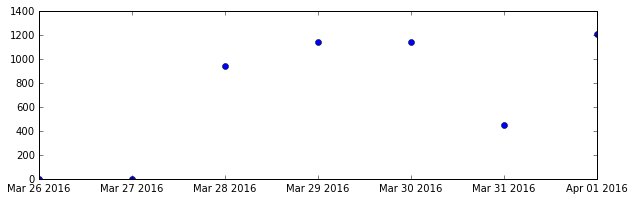

In [10]:
%matplotlib inline
dates_turnstile = []
counts_turnstile = []
for item in my_dict3[first_key]:
    dates_turnstile.append(item[0])
    counts_turnstile.append(item[1])
plt.figure(figsize=(10,3))
plt.plot(dates_turnstile,counts_turnstile,'bo')
plt.show()